- NER
- TF IDF
- we will use most common words to categorize the podcasts by topics we can also use semantics (negative, positive, neutral)
- lexical diversity

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from camel_tools.tokenizers.word import simple_word_tokenize
import os
import nltk
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def read_transcripts(channel_name, base_path):
    channel_path = os.path.join(base_path, channel_name)
    transcripts = []
    
    if not os.path.exists(channel_path):
        print(f"Channel '{channel_name}' not found.")
        return []
    
    channel_path += "/raw_transcripts"
    for file_name in sorted(os.listdir(channel_path)):
        file_path = os.path.join(channel_path, file_name)
        
        if file_name.endswith(".txt") and os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                transcripts.append(file.read())
    
    return transcripts

base_folder = "./Podcasts" 

awelmara_channel = "Awel Marra - أول مرة" 
awelmara_all_transcripts = read_transcripts(awelmara_channel, base_folder)

# foodcast_channel = "FoodCast"
# foodcast_all_transcripts = read_transcripts(foodcast_channel, base_folder)

# karohat_channel = "karohat - كاروهات"
#karohat_all_transcripts = read_transcripts(karohat_channel, base_folder)

# moshekla_channel = "إيه المشكلة"
#moshkela_all_transcripts = read_transcripts(moshkela_channel, base_folder)

# eng_channel = "البشمهندس"
#engt_all_transcripts = read_transcripts(eng_channel, base_folder)

# hawadeet_channel = "حواديت حقيقية"
#hawadeet_all_transcripts = read_transcripts(hawadeet_channel, base_folder)

# montaj_channel = "من غير مونتاج"
#montaj_all_transcripts = read_transcripts(montaj_channel, base_folder)

# nilly_channel = "نيللى وحكايات الدايت بودكاست Nilly Shams"
#nilly_all_transcripts = read_transcripts(nilly_channel, base_folder)

In [4]:
punctuations = list("?:!.,;؟''`÷×؛<>()*&^%][ـ،/:؟.,'{}~¦+|!”…“–ـ'''")
nltk_stop_words = stopwords.words('arabic')

In [5]:
khatib_stopwords = """
،
ـ
ء
ءَ
آ
أ
ا
ا?
االا
االتى
آب
أبٌ
ابتدأ
أبدا
أبريل
أبو
ابين
اتخذ
اثر
اثنا
اثنان
اثني
اثنين
أجل
اجل
أجمع
أحد
احد
إحدى
أخٌ
أخبر
أخذ
آخر
اخرى
اخلولق
أخو
إذ
إذا
إذاً
اذا
آذار
إذما
إذن
أربع
أربعاء
أربعة
اربعة
أربعمائة
أربعمئة
اربعون
اربعين
ارتدّ
أرى
إزاء
استحال
أسكن
أصبح
اصبح
أصلا
آض
إضافي
أضحى
اضحى
اطار
أطعم
اعادة
أعطى
أعلم
اعلنت
أغسطس
أُفٍّ
أفٍّ
اف
أفريل
أفعل به
أقبل
أكتوبر
أكثر
اكثر
اكد
آل
أل
ألا
إلا
إلّا
الا
الاخيرة
الألاء
الألى
الآن
الان
الاول
الاولى
التي
التى
الثاني
الثانية
الحالي
الذاتي
الذي
الذى
الذين
السابق
ألف
الف
ألفى
اللاتي
اللتان
اللتيا
اللتين
اللذان
اللذين
اللواتي
الماضي
المقبل
الوقت
إلي
إلى
الي
الى
إلَيْكَ
إليكَ
إليكم
إليكما
إليكنّ
اليه
اليها
اليوم
أم
أما
أمّا
إما
إمّا
اما
أمام
امام
أمامك
أمامكَ
أمد
أمس
امس
أمسى
امسى
آمينَ
أن
أنًّ
إن
إنَّ
ان
أنا
آناء
أنبأ
انبرى
أنت
أنتِ
انت
أنتم
أنتما
أنتن
أنشأ
آنفا
أنفسكم
أنفسنا
أنفسهم
انقلب
أنه
إنه
انه
أنها
إنها
انها
أنّى
آه
آهٍ
آهِ
آهاً
أهلا
أو
او
أوت
أوشك
أول
اول
أولاء
أولالك
أولئك
أوّهْ
أي
أيّ
أى
إى
اي
اى
ا?ى
أيا
أيار
ايار
إياك
إياكم
إياكما
إياكن
ايام
ّأيّان
أيّان
إيانا
إياه
إياها
إياهم
إياهما
إياهن
إياي
أيضا
ايضا
أيلول
أين
إيهٍ
ب
باء
بات
باسم
بأن
بإن
بان
بخٍ
بد
بدلا
برس
بَسْ
بسّ
بسبب
بشكل
بضع
بطآن
بعد
بعدا
بعض
بعيدا
بغتة
بل
بَلْهَ
بلى
بن
به
بها
بهذا
بؤسا
بئس
بيد
بين
بينما
ة
ت
تاء
تارة
تاسع
تانِ
تانِك
تبدّل
تجاه
تحت
تحت'
تحوّل
تخذ
ترك
تسع
تسعة
تسعمائة
تسعمئة
تسعون
تسعين
تشرين
تعسا
تعلَّم
تفعلان
تفعلون
تفعلين
تكون
تلقاء
تلك
تم
تموز
تِه
تِي
تَيْنِ
تينك
ث
ثاء
ثالث
ثامن
ثان
ثاني
ثانية
ثلاث
ثلاثاء
ثلاثة
ثلاثمائة
ثلاثمئة
ثلاثون
ثلاثين
ثم
ثمَّ
ثمّ
ثمان
ثمانمئة
ثمانون
ثماني
ثمانية
ثمانين
ثمّة
ثمنمئة
ج
جانفي
جدا
جعل
جلل
جمعة
جميع
جنيه
جوان
جويلية
جير
جيم
ح
حاء
حادي
حار
حاشا
حاليا
حاي
حبذا
حبيب
حتى
حجا
حدَث
حَذارِ
حرى
حزيران
حسب
حقا
حمٌ
حمدا
حمو
حوالى
حول
حيَّ
حيث
حيثما
حين
خ
خاء
خارج
خاصة
خال
خامس
خبَّر
خلا
خلافا
خلال
خلف
خمس
خمسة
خمسمائة
خمسمئة
خمسون
خمسين
خميس
د
دال
درهم
درى
دواليك
دولار
دون
دونك
ديسمبر
ديك
دينار
ذ
ذا
ذات
ذاك
ذال
ذانِ
ذانك
ذلك
ذِه
ذهب
ذو
ذِي
ذيت
ذَيْنِ
ذينك
ر
راء
رابع
راح
رأى
رُبَّ
رجع
رزق
رويدك
ريال
ريث
ز
زاي
زعم
زود
زيارة
س
ساء
سابع
سادس
سبت
سبتمبر
سبحان
سبع
سبعة
سبعمائة
سبعمئة
سبعون
سبعين
ست
ستة
ستكون
ستمائة
ستمئة
ستون
ستين
سحقا
سرا
سرعان
سقى
سمعا
سنة
سنتيم
سنوات
سوف
سوى
سين
ش
شباط
شبه
شَتَّانَ
شتانَ
شخصا
شرع
شمال
شيكل
شين
ص
صاد
صار
صباح
صباحا
صبر
صبرا
صدقا
صراحة
صفر
صهٍ
صهْ
ض
ضاد
ضحوة
ضد
ضمن
ط
طاء
طاق
طالما
طرا
طفق
طَق
ظ
ظاء
ظل
ظلّ
ظنَّ
ع
عاد
عاشر
عام
عاما
عامة
عجبا
عدَّ
عدا
عدة
عدد
عَدَسْ
عدم
عسى
عشر
عشرة
عشرون
عشرين
عل
علًّ
علق
علم
علي
على
عليك
عليه
عليها
عن
عند
عندما
عنه
عنها
عوض
عيانا
عين
غ
غادر
غالبا
غدا
غداة
غير
غين
ف
فاء
فأن
فإن
فان
فانه
فبراير
فرادى
فضلا
فعل
فقد
فقط
فكان
فلان
فلس
فما
فهو
فهي
فهى
فو
فوق
في
فى
فيفري
فيه
فيها
ق
قاطبة
قاف
قال
قام
قبل
قد
قرش
قطّ
قلما
قليل
قوة
ك
كاد
كاف
كأن
كأنّ
كان
كانت
كانون
كأيّ
كأيّن
كثيرا
كِخ
كذا
كذلك
كرب
كسا
كل
كلا
كلَّا
كلتا
كلم
كلّما
كم
كما
كن
كى
كيت
كيف
كيفما
ل
لا
لات
لازال
لاسيما
لا سيما
لام
لأن
لايزال
لبيك
لدن
لدي
لدى
لديه
لذلك
لعل
لعلَّ
لعمر
لقاء
لك
لكن
لكنَّ
لكنه
للامم
لم
لما
لمّا
لماذا
لن
لنا
له
لها
لهذا
لهم
لو
لوكالة
لولا
لوما
لي
ليت
ليرة
ليس
ليسب
م
ما
ما أفعله
ماانفك
ما انفك
مابرح
ما برح
مادام
ماذا
مارس
مازال
مافتئ
ماي
مائة
مايزال
مايو
متى
مثل
مذ
مرة
مرّة
مساء
مع
معاذ
معظم
معه
معها
مقابل
مكانَك
مكانكم
مكانكما
مكانكنّ
مليار
مليم
مليون
مما
من
منذ
منه
منها
مه
مهما
مئة
مئتان
ميم
ن
نَّ
نا
نبَّا
نحن
نحو
نَخْ
نعم
نفس
نفسك
نفسه
نفسها
نفسي
نهاية
نوفمبر
نون
نيسان
نيف
ه
ها
هاء
هَاتانِ
هَاتِه
هَاتِي
هَاتَيْنِ
هاكَ
هبّ
هَجْ
هذا
هَذا
هَذانِ
هذه
هَذِه
هَذِي
هَذَيْنِ
هكذا
هل
هلّا
هللة
هلم
هم
هما
همزة
هن
هنا
هناك
هنالك
هو
هؤلاء
هَؤلاء
هي
هى
هيا
هيّا
هيهات
هَيْهات
ؤ
و
و6
وا
وأبو
واحد
واضاف
واضافت
واكد
والتي
والذي
وأن
وإن
وان
واهاً
واو
واوضح
وبين
وثي
وجد
وجود
وراءَك
ورد
وُشْكَانَ
وعلى
وفي
وقال
وقالت
وقد
وقف
وكان
وكانت
وكل
ولا
ولايزال
ولكن
ولم
ولن
وله
وليس
وما
ومع
ومن
وهب
وهذا
وهو
وهي
وهى
وَيْ
ي
ى
ئ
ياء
يجري
يفعلان
يفعلون
يكون
يلي
يمكن
يمين
ين
يناير
ينبغي
يوان
يورو
يوليو
يوم
يونيو
يعني
اه
أه
كده
كدا
ال
لأ
بقي
بقى
عندك
اللي
دي
ده
مش
إللي
ممكن
"""
khatib_stopwords = khatib_stopwords.split('\n')

In [6]:
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def tokenize_text(text):
    text = re.sub(r'\b\d{1,2}:\d{2}\b', '', text)
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = simple_word_tokenize(text, split_digits=True)
    tokens = [word for word in tokens if word not in punctuations]
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]
    tokens = [word for word in tokens if word not in khatib_stopwords]
    tokens = [word for word in tokens if word not in nltk_stop_words]
    tokens = [word for word in tokens if word not in digits]
    return tokens


def extract_ngrams(text, n=2):
    tokens = tokenize_text(text)
    return list(ngrams(tokens, n))

def get_common_ngrams(text, n=2, top_k=10):
    all_ngrams = extract_ngrams(text, n)
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(top_k)

def tfidf_analysis(text, n=2):
    tokens = tokenize_text(text)
    text = ' '.join(tokens)
    vectorizer = TfidfVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform([text]) 

    feature_names = vectorizer.get_feature_names_out()
    scores = X.toarray().flatten() 

    tfidf_ranking = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)
    return tfidf_ranking[:10]

# if all transcripts are in one string
text = ' '.join(awelmara_all_transcripts)

print("Top Bigrams (Most Common Phrases):")
print(get_common_ngrams(text, n=2))

print("\nTop Trigrams (Most Common Phrases):")
print(get_common_ngrams(text, n=3))

print("\nUnique Bigram Phrases using TF-IDF:")
print(tfidf_analysis(text, n=2))


Top Bigrams (Most Common Phrases):
[(('هاهاها', 'هاهاها'), 44), (('إحنا', 'بنتكلم'), 23), (('ناس', 'كتير'), 20), (('مفيش', 'حد'), 18), (('ليها', 'علاقة'), 18), (('مفيش', 'حاجة'), 17), (('الحمد', 'لله'), 17), (('إحنا', 'عايزين'), 16), (('خليني', 'أسألك'), 16), (('وجهة', 'نظر'), 15)]

Top Trigrams (Most Common Phrases):
[(('مفيش', 'حاجة', 'اسمها'), 6), (('هاهاها', 'والله', 'العظيم'), 5), (('لحظة', 'صمت', 'مزعجة'), 5), (('حاجة', 'ليها', 'علاقة'), 5), (('حاجات', 'ليها', 'علاقة'), 5), (('دلوقتي', 'زي', 'الستات'), 5), (('زي', 'الستات', 'زمان'), 5), (('إحنا', 'سألنا', 'البنات'), 4), (('دراما', 'الغيرة', 'دراما'), 4), (('إنك', 'تبقى', 'عارف'), 4)]

Unique Bigram Phrases using TF-IDF:
[('هاهاها هاهاها', 0.18572345817052346), ('إحنا بنتكلم', 0.09708271677095544), ('ناس كتير', 0.0844197537138743), ('ليها علاقة', 0.07597777834248687), ('مفيش حد', 0.07597777834248687), ('الحمد لله', 0.07175679065679315), ('مفيش حاجة', 0.07175679065679315), ('إحنا عايزين', 0.06753580297109944), ('خليني أسألك', 0.067

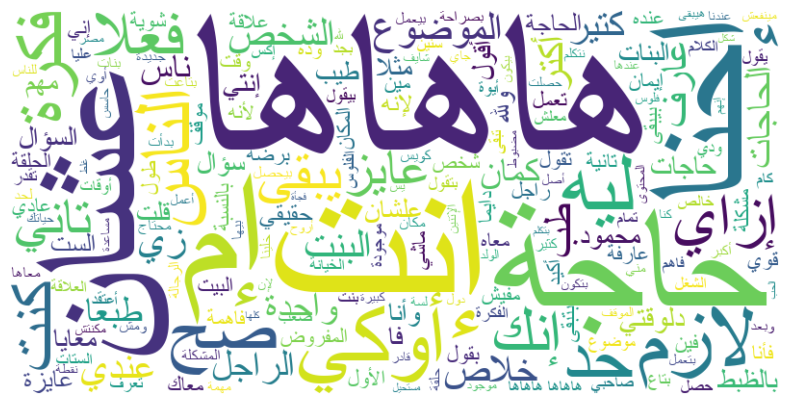

In [7]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

def generate_wordcloud(text):
    tokens = tokenize_text(text)
    text = ' '.join(tokens)
    reshaped_text = reshape(text)
    bidi_text = get_display(reshaped_text)
    wordcloud = WordCloud(
        font_path='Arial.ttf',
        width=800, height=400,
        background_color='white'
    ).generate(bidi_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



generate_wordcloud(text)

In [8]:
from camel_tools.sentiment import SentimentAnalyzer

sa = SentimentAnalyzer("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")

sentiment = sa.predict(text)
print(f"Sentiment: {sentiment}")

d:\MATERIAL\LAST SEMESTER\nlp\project 1\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\MATERIAL\LAST SEMESTER\nlp\project 1\venv\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\youss\.cache\huggingface\hub\models--CAMeL-Lab--bert-base-arabic-camelbert-da-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python 

Sentiment: ['neutral']
